# Bài 1: Numpy và Linear Regression

Trong bài thực hành này, chúng ta sẽ 
- làm quen với numpy, một thư viện hỗ trợ tính toán trên ma trận và tensor hiệu quả;
- giải linear regression bằng exact solution


## 1. Numpy
### Lớp np.array

In [ ]:
import numpy as np                 ## thêm thư viện với tên tắt là np

an_array = np.array([3, 33, 333])  #Tạo một mảng 1 chiều

print(type(an_array))              #In lớp của object vừa tạo

<class 'numpy.ndarray'>


In [ ]:
print(an_array.shape)              #In kích thước của mảng

(3,)


In [ ]:
print(an_array[0], an_array[1], an_array[2])    # Truy suất từng phần tử của mảng bằng index

3 33 333


In [ ]:
an_array[0] =888            # ta có thể thay đổi giá trị của một phần tử trong mảng bằng lệnh truy suất và gán

print(an_array)

[888  33 333]


In [ ]:
another = np.array([[11,12,13],[21,22,23]])   # tạo một mảng 2 chiều (ma trận)

print(another)  # in ma trận

print("Kích thước của ma trậng 2 dòng, 3 cột: ", another.shape)  # số hàng x số cột            

print("Truy suất các phần tử tại [0,0], [0,1], và [1,0] của ma trận: ", another[0, 0], ", ",another[0, 1],", ", another[1, 0])

[[11 12 13]
 [21 22 23]]
Kích thước của ma trậng 2 dòng, 3 cột:  (2, 3)
Truy suất các phần tử tại [0,0], [0,1], và [1,0] của ma trận:  11 ,  12 ,  21


In [ ]:
another[1][0]

21

### Các phép toán

In [ ]:
x = np.array([[111,112],[121,122]], dtype=np.int32)                  ## tạo một ma trận với từng phẩn từ kiểu int
y = np.array([[211.1,212.1],[221.1,222.1]], dtype=np.float64)      ## tạo một ma trận với từng phẩn từ kiểu float64

print(x)
print()
print(y)

[[111 112]
 [121 122]]

[[211.1 212.1]
 [221.1 222.1]]


In [ ]:
# cộng ma trận
print(x + y)        

[[322.1 324.1]
 [342.1 344.1]]


In [ ]:
# trừ
print(x - y)

[[-100.1 -100.1]
 [-100.1 -100.1]]


In [ ]:
# nhân từng phần tử (element-wise product)
print(x * y)

[[23432.1 23755.2]
 [26753.1 27096.2]]


In [ ]:
# chia từng phần tử
print(x / y)

[[0.52581715 0.52805281]
 [0.54726368 0.54930212]]


In [ ]:
# nhân ma trận
print(np.matmul(x, y))

[[48195.3 48418.3]
 [52517.3 52760.3]]


In [ ]:
# nhân cho một số thực
print(0.01*x)

[[1.11 1.12]
 [1.21 1.22]]


In [ ]:
# tính ma trận nghịch đảo
print(np.linalg.inv(x))

[[-12.2  11.2]
 [ 12.1 -11.1]]


In [ ]:
# chuyển vị
print(x.T)

[[111 121]
 [112 122]]


### Các hàm khác

In [ ]:
# reshape 2x2 thành 4x1
print(x.reshape(4,1))

[[111]
 [112]
 [121]
 [122]]


In [ ]:
#tạo một ma trận toàn giá trị 1 có kích thước 3x4
print(np.ones((3,4)))

[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]


In [ ]:
# nối 2 ma trận bằng cách nối cột với nhau
np.concatenate([x,y], axis=1)

array([[111. , 112. , 211.1, 212.1],
       [121. , 122. , 221.1, 222.1]])

In [ ]:
# nối 2 ma trận bằng cách nối hàng với nhau
np.concatenate([x,y], axis=0)

array([[111. , 112. ],
       [121. , 122. ],
       [211.1, 212.1],
       [221.1, 222.1]])

## 2. Linear Regression

In [ ]:
#tải dataset
!gdown --id 1Lt3jOk7_jcgvhfsEnSaBDQZ2-AVOVCnv

Downloading...
From: https://drive.google.com/uc?id=1Lt3jOk7_jcgvhfsEnSaBDQZ2-AVOVCnv
To: /content/House_Price.csv
100% 927/927 [00:00<00:00, 1.16MB/s]


In [ ]:
import pandas as pd
df = pd.read_csv("./House_Price.csv")        ## load file csv vào pd.DataFrame

In [ ]:
df.head()             ## xem thử DataFrame

,Size in feet squared,Price in thousand dollar
0,2497,729
1,1627,617
2,576,290
3,2156,728
4,1154,453


Text(0, 0.5, 'Price in thousand dollar')

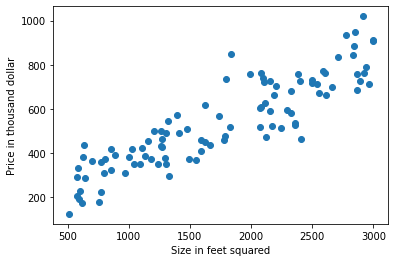

In [ ]:
## vẽ hình
import matplotlib.pyplot as plt
plt.scatter(df["Size in feet squared"], df["Price in thousand dollar"])
plt.xlabel("Size in feet squared")
plt.ylabel("Price in thousand dollar")

Bây giờ chúng ta muốn làm một bài toán dựa vào kích thước của ngôi nhà, đoán giá tiền

- $X$ = diện tích ngôi nhà

- $y$ = giá tiền (chưa biết, muốn dự đoán)

Ta giả thiết $\hat{y} = aX + b$  với $a$ và $b$ là số thực

Ta tìm $a$ và $b$ sao cho trung bình bình phương sai số nhỏ nhất khi đoán, tức là tìm $a$ và $b$ sao cho

$$ \frac{1}{n} \sum (y-\hat{y})^2 = \frac{1}{n} \sum (y - aX - b)^2 $$

đạt giá trị nhỏ nhất, với $n$ là số mẫu.

Với $X$, $y$ là các ma trận với mỗi hàng là một sample, $X$ là data và $y$ là target.
Gọi $Z$ là mận trận mở rộng của $X$ nhưng có thêm một cột toàn số 1.
Khi đó nghiệm của bài toán Linear Regression là
$$(Z^TZ)^{-1}Z^Ty.$$

Tức là trong bài toán này, mỗi hàng của $X$ là diện tích của một căn nhà, tương ứng hàng của $y$ là giá của nhà đó. Cụ thể, bài toán được lập trình như sau

In [ ]:
X = df['Size in feet squared'].values  
print(X.shape)  ## trích diện tích thành một mảng numpy
X = X.reshape(-1, 1)                     ## chuyển thành ma trận cột
print(X.shape)

(100,)
(100, 1)


In [ ]:
y = df['Price in thousand dollar'].values   ## Trích giá tiền 
print(y.shape)
y = y.reshape(-1,1)
print(y.shape)

(100,)
(100, 1)


In [ ]:
Z = np.concatenate([X, np.ones((100,1))], axis=-1)   ## thêm một cột vào sau X và gán vào Z
Z = Z.astype(np.float32)                                 ## chuyển sang float
print(Z)

[[2.497e+03 1.000e+00]
 [1.627e+03 1.000e+00]
 [5.760e+02 1.000e+00]
 [2.156e+03 1.000e+00]
 [1.154e+03 1.000e+00]
 [2.404e+03 1.000e+00]
 [1.993e+03 1.000e+00]
 [2.659e+03 1.000e+00]
 [7.570e+02 1.000e+00]
 [2.082e+03 1.000e+00]
 [2.832e+03 1.000e+00]
 [1.329e+03 1.000e+00]
 [2.117e+03 1.000e+00]
 [2.774e+03 1.000e+00]
 [5.910e+02 1.000e+00]
 [1.263e+03 1.000e+00]
 [1.495e+03 1.000e+00]
 [1.480e+03 1.000e+00]
 [6.430e+02 1.000e+00]
 [6.270e+02 1.000e+00]
 [1.783e+03 1.000e+00]
 [6.020e+02 1.000e+00]
 [2.918e+03 1.000e+00]
 [2.607e+03 1.000e+00]
 [2.208e+03 1.000e+00]
 [2.085e+03 1.000e+00]
 [1.826e+03 1.000e+00]
 [2.863e+03 1.000e+00]
 [2.110e+03 1.000e+00]
 [2.072e+03 1.000e+00]
 [2.169e+03 1.000e+00]
 [5.080e+02 1.000e+00]
 [2.617e+03 1.000e+00]
 [2.554e+03 1.000e+00]
 [1.265e+03 1.000e+00]
 [2.096e+03 1.000e+00]
 [2.852e+03 1.000e+00]
 [2.361e+03 1.000e+00]
 [1.797e+03 1.000e+00]
 [1.737e+03 1.000e+00]
 [1.180e+03 1.000e+00]
 [2.542e+03 1.000e+00]
 [2.500e+03 1.000e+00]
 [8.570e+02

In [ ]:
## giá trị a và b tìm được
np.matmul(np.matmul(np.linalg.inv(np.matmul(Z.T,Z)), Z.T), y)

array([[  0.23481099],
       [128.49492905]])

Text(0, 0.5, 'Price in thousand dollar')

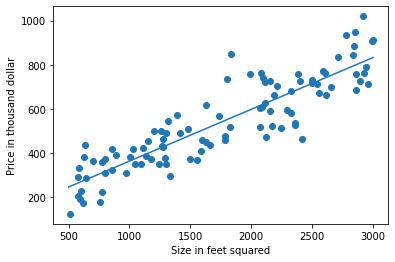

In [ ]:
## vẽ hình
import matplotlib.pyplot as plt
plt.scatter(df["Size in feet squared"], df["Price in thousand dollar"])
plt.plot(np.arange(500, 3000), 0.23481099*np.arange(500, 3000) + 128.49492905)   ## vẽ solution tìm được
plt.xlabel("Size in feet squared")
plt.ylabel("Price in thousand dollar")

## Bài tập
Cho dữ liệu gồm 100 hàng, gồm chiều rộng, chiều dài và giá của một ngôi nhà, hay xây dựng một mô hình dư đoán giá nhà dựa vào chiều dài và rộng.

Hãy dùng mô hình học được: dự đoán xem căn nhà có thông số sau khả năng cao là giá bao nhiêu:
- width = 5, length = 10
- width = 20, length = 20
- width = 10, length = 40

## Nộp bài
- Code và chạy kết quả lưu vào file notebook NMMH_TH1_MSSV.ipynb (notebook phải có kết quả chạy nếu ko xem như chưa làm)
- Nộp file notebook có đuôi .ipynb và nộp về: huynhthanh98vn@gmail.com
- Deadline: 23g59 thứ 6 ngày 15/04/2022. Nộp trễ bị chia đôi số điểm.

In [ ]:
#tải data số 2
!gdown --id 1xmaX9QHTWnKe58oIMT1ohnhPLU15WQ2O

Downloading...
From: https://drive.google.com/uc?id=1xmaX9QHTWnKe58oIMT1ohnhPLU15WQ2O
To: /content/House_Price_2.csv
100% 2.46k/2.46k [00:00<00:00, 3.15MB/s]


In [ ]:
df = pd.read_csv("House_Price_2.csv")
df

,width,length,price
0,28,97,3.350184e+08
1,21,62,2.298295e+08
2,27,64,2.603552e+08
3,5,92,2.064708e+08
4,13,84,2.339808e+08
...,...,...,...
95,23,94,3.055955e+08
96,10,69,1.890808e+08
97,11,35,1.305380e+08
98,8,66,1.701948e+08
